# Загрузка библиотек

In [724]:
!pip install eli5

^C


In [725]:
!pip install xgboost

^C


In [726]:
!pip install pandas_profiling

^C


In [727]:
!pip install holoviews

^C


In [494]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

import pandas_profiling
from pandas import Series
import pandas.core.algorithms as algos
import numpy as np
# import holoviews as hv

import seaborn as sns
sns.set(font_scale=1.5, style='whitegrid')

import plotly.express as px

import matplotlib.pyplot as plt
# hv.extension('matplotlib')
%matplotlib inline

import scipy.stats.stats as stats
import re
import traceback
import string

# Загрузка и проверка данных

In [495]:
for_model = pd.read_excel(r"data\sciencehack-for-beginners\For_model_labled.xlsx")
target = pd.read_excel(r"data\sciencehack-for-beginners\For_check_unlabled.xlsx")

In [496]:
for_model.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,20.62800,0.571144,1.795240,-1,2.57188,-2.15672,-1.30836,0.501343,2.52255,0.197459,-2.59630,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,6.98534,-1.858470,2.304500,1,67.16120,-8.24769,11.37090,-65.675800,14.04710,-2.246710,2.19832,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,1.96592,0.648077,-1.393620,1,33.86190,-30.87370,-8.12102,11.291100,31.92390,0.346700,-2.88438,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,29.83510,1.647090,2.075850,1,22.38180,2.30876,7.14518,21.084600,7.50892,1.755900,1.25826,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,2.86791,-0.482756,-0.122994,1,27.96590,-4.05881,-9.86542,-25.851300,10.66770,-1.618370,-1.96111,11.0105,1


In [497]:
target.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Unnamed: 18
0,148029,100003381,65.06780,5.37255,13.70060,63.381800,14.71640,2.166580,1.197080,-1,29.0169,4.54971,3.45453,28.4490,5.71258,2.30852,0.649418,5.12717,NaN
1,148031,100042391,3.12536,2.22344,2.00679,-0.892737,2.99514,-0.293816,0.734227,-1,116.8820,6.82027,-21.85020,114.6190,22.88990,2.31389,-1.268240,31.50580,NaN
2,146511,100064781,71.24670,11.72080,4.58175,70.126500,12.58450,2.418930,0.372643,-1,66.1437,-12.58850,-4.71148,64.7636,13.44130,2.27616,-2.783460,26.07740,NaN
3,149181,100065292,95.40600,9.38112,-35.11730,-88.210400,36.34870,-1.619690,-1.309760,1,18.6863,1.74850,-3.03126,18.3557,3.49940,2.35946,-1.047590,80.98260,NaN
4,149181,1000680111,47.24090,-18.94710,-12.78630,41.342700,22.85790,1.354650,-2.547950,1,15.1625,-2.22888,-2.47818,14.7916,3.33305,2.19578,-2.303280,7.85455,NaN


In [498]:
for_model.shape

(84999, 19)

In [499]:
target.shape

(14598, 19)

In [500]:
for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84999 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84999 non-null  int64  
 1   Event   84999 non-null  int64  
 2   E1      84999 non-null  float64
 3   px1     84999 non-null  float64
 4   py1     84999 non-null  float64
 5   pz1     84999 non-null  float64
 6   pt1     84999 non-null  float64
 7   eta1    84999 non-null  float64
 8   phi1    84999 non-null  float64
 9   Q1      84999 non-null  int64  
 10  E2      84999 non-null  float64
 11  px2     84999 non-null  float64
 12  py2     84999 non-null  float64
 13  pz2     84999 non-null  float64
 14  pt2     84999 non-null  float64
 15  eta2    84999 non-null  float64
 16  phi2    84999 non-null  float64
 17  M       84915 non-null  float64
 18  Q2      84999 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 12.3 MB


# Заполняем NaN-значения

Такие значения присутствуют только в колонке M. Заполняем их по формуле

In [501]:
# for_model['M'].fillna(for_model['M'].mean(), inplace=True)# - just inplace None to mean of all means 

# X_train_model_M = for_model[for_model["M"].notna()].drop(columns=["M"])
# y_train_model_M = for_model[for_model["M"].notna()]["M"]
# X_test_model_M = for_model[for_model["M"].isnull()].drop(columns=["M"])
# model_M = xgb.XGBRegressor()
# model_M.fit(X_train_model_M, y_train_model_M)
# y_test_model_M = model_M.predict(X_test_model_M)
# nan_indexes = for_model[for_model["M"].isnull()].index
# nan_indexes = nan_indexes.to_list()
# for_model["M"][nan_indexes] = pd.Series(y_test_model_M)
# for_model["M"] # regression

# nan_indexes = for_model[for_model["M"].isnull()].index
# nan_indexes = nan_indexes.to_list()
# for_model.drop(index=nan_indexes, inplace=True) # delete

for_M = for_model[for_model["M"].isnull()].drop(columns=["M"])
targs = []
for_M.head()
for i in range(len(for_M["Event"])):
    e12 = for_M.iloc[i]["E1"] + for_M.iloc[i]["E2"]
    p12 = np.sqrt((for_M.iloc[i]["px1"] + for_M.iloc[i]["px2"]) ** 2 + (for_M.iloc[i]["py1"] + for_M.iloc[i]["py2"]) ** 2 + (for_M.iloc[i]["pz1"] + for_M.iloc[i]["pz2"]) ** 2)
    targ = np.sqrt(abs(e12 ** 2 - p12 ** 2))
    targs.append(targ)
nan_indexes = for_model[for_model["M"].isnull()].index
nan_indexes = nan_indexes.to_list()
for_model["M"][nan_indexes] = pd.Series(targs)
for_model.tail()

<ipython-input-501-08505a111097>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_model["M"][nan_indexes] = pd.Series(targs)


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,M,Q2
84994,149181,364414548,1.40699,-0.728904,0.647857,1.01420,0.975202,0.909370,2.414990,-1,24.62280,-12.73870,11.36170,17.74600,17.0693,0.909127,2.413270,0.030878,1
84995,146944,654554592,24.21200,10.780400,-12.116100,17.97790,16.217800,0.956076,-0.843667,1,2.62073,1.16556,-1.31086,1.94715,1.7541,0.957094,-0.844003,0.037860,-1
84996,147929,252498172,2.71035,0.258549,1.792850,2.01614,1.811400,0.959084,1.427570,-1,19.28590,1.83493,12.76360,14.34110,12.8948,0.958503,1.428010,0.053129,1
84997,146944,140039199,3.47801,-0.733209,2.166230,2.62038,2.286960,0.980804,1.897160,-1,16.78890,-3.52827,10.45790,12.65110,11.0370,0.981098,1.896180,0.026039,1
84998,146644,1614382245,7.38536,-2.363610,-2.970070,6.33526,3.795790,1.285010,-2.242980,-1,54.26190,-17.36100,-21.81590,46.55120,27.8808,1.285330,-2.242970,0.049656,1


In [502]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14598 entries, 0 to 14597
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Run          14598 non-null  int64  
 1   Event        14598 non-null  int64  
 2   E1           14598 non-null  float64
 3   px1          14598 non-null  float64
 4   py1          14598 non-null  float64
 5   pz1          14598 non-null  float64
 6   pt1          14598 non-null  float64
 7   eta1         14598 non-null  float64
 8   phi1         14598 non-null  float64
 9   Q1           14598 non-null  int64  
 10  E2           14598 non-null  float64
 11  px2          14598 non-null  float64
 12  py2          14598 non-null  float64
 13  pz2          14598 non-null  float64
 14  pt2          14598 non-null  float64
 15  eta2         14598 non-null  float64
 16  phi2         14598 non-null  float64
 17  M            14597 non-null  float64
 18  Unnamed: 18  0 non-null      float64
dtypes: f

In [503]:
target['M'].fillna(target['M'].mean(), inplace=True)

In [504]:
target = target.drop(columns = ["Unnamed: 18"]) # удаляем ненужную колонку

In [505]:
for_model['Q1'].value_counts()

-1    42574
 1    42425
Name: Q1, dtype: int64

In [506]:
for_model['Q2'].value_counts()

-1    42682
 1    42317
Name: Q2, dtype: int64

# Обрабатываем выбросы

In [507]:
numeric_col = ["E1", "px1", "py1", "pz1", "pt1", "eta1", "phi1", "Q1", "E2", "px2", "py2", "pz2", "pt2", "eta2", "phi2", "M"]

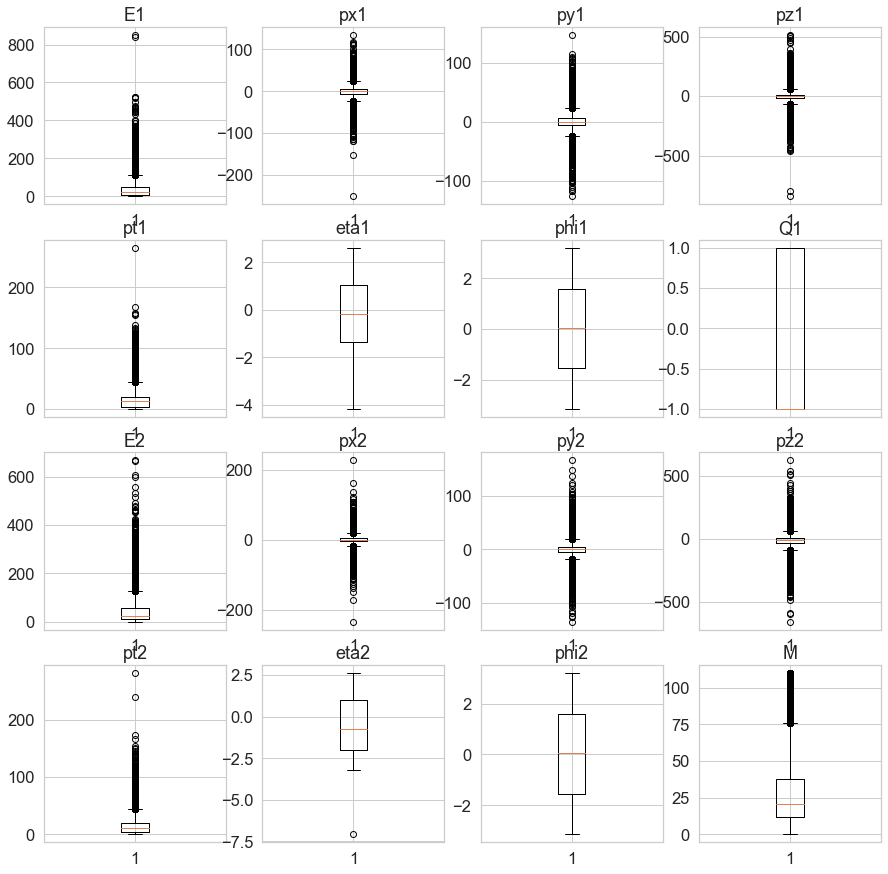

In [508]:
plt.figure(figsize=(15,15))
for i in range(len(numeric_col)):
    plt.subplot(4, 4, i + 1).set_title(numeric_col[i])
    plt.boxplot(x=for_model[numeric_col[i]])

In [509]:
# for x in numeric_col:
#     q25, q75 = np.percentile(for_model[x],[25, 75])
#     iqr = q75 - q25
#     is_max = q75 + (1.5 * iqr)
#     is_min = q25 - (1.5 * iqr)
#     for_model.loc[(for_model[x] < is_min), x] = np.nan
#     for_model.loc[(for_model[x] > is_max), x] = np.nan

In [510]:
#E1
len(for_model[(for_model["E1"] > 300)]["E1"]) # 300
for_model.loc[(for_model["E1"] > 300), "E1"] = np.nan

In [511]:
#px1
len(for_model[(for_model["px1"] > 70) | (for_model["px1"] < -100)]["px1"]) #70 -100
for_model.loc[(for_model["px1"] > 70) | (for_model["px1"] < -100), "px1"] = np.nan

In [512]:
#py1
len(for_model[(for_model["py1"] > 70) | (for_model["py1"] < -100)]["py1"])
for_model.loc[(for_model["py1"] > 70) | (for_model["py1"] < -100), "py1"] = np.nan

In [513]:
#pz1
len(for_model[(for_model["pz1"] > 300) | (for_model["pz1"] < -300)]["pz1"])
for_model.loc[(for_model["pz1"] > 300) | (for_model["pz1"] < -300), "pz1"] = np.nan

In [514]:
#pt1
len(for_model[(for_model["pt1"] > 105)]["pt1"])
for_model.loc[(for_model["pt1"] > 105), "pt1"] = np.nan

In [515]:
#E2
len(for_model[(for_model["E2"] > 300)]["E2"])
for_model.loc[(for_model["E2"] > 300), "E2"] = np.nan

In [516]:
#px2
len(for_model[(for_model["px2"] > 70) | (for_model["px2"] < -100)]["px2"])
for_model.loc[(for_model["px2"] > 70) | (for_model["px2"] < -100), "px2"] = np.nan

In [517]:
#py2
len(for_model[(for_model["py2"] > 70) | (for_model["py2"] < -100)]["py2"])
for_model.loc[(for_model["py2"] > 70) | (for_model["py2"] < -100), "py2"] = np.nan

In [518]:
#pz2
len(for_model[(for_model["pz2"] > 300) | (for_model["pz2"] < -300)]["pz2"])
for_model.loc[(for_model["pz2"] > 300) | (for_model["pz2"] < -300), "pz2"] = np.nan

In [519]:
#pt2
len(for_model[(for_model["pt2"] > 105)]["pt2"])
for_model.loc[(for_model["pt2"] > 105), "pt2"] = np.nan

In [520]:
#M
len(for_model[(for_model["pt2"] > 105)]["pt2"])
for_model.loc[(for_model["pt2"] > 105), "pt2"] = np.nan

In [521]:
for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84999 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84999 non-null  int64  
 1   Event   84999 non-null  int64  
 2   E1      84918 non-null  float64
 3   px1     84948 non-null  float64
 4   py1     84945 non-null  float64
 5   pz1     84935 non-null  float64
 6   pt1     84959 non-null  float64
 7   eta1    84999 non-null  float64
 8   phi1    84999 non-null  float64
 9   Q1      84999 non-null  int64  
 10  E2      84890 non-null  float64
 11  px2     84942 non-null  float64
 12  py2     84940 non-null  float64
 13  pz2     84900 non-null  float64
 14  pt2     84952 non-null  float64
 15  eta2    84999 non-null  float64
 16  phi2    84999 non-null  float64
 17  M       84999 non-null  float64
 18  Q2      84999 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 12.3 MB


In [522]:
for_model = for_model.dropna(axis = 0)

In [523]:
for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84632 entries, 0 to 84998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     84632 non-null  int64  
 1   Event   84632 non-null  int64  
 2   E1      84632 non-null  float64
 3   px1     84632 non-null  float64
 4   py1     84632 non-null  float64
 5   pz1     84632 non-null  float64
 6   pt1     84632 non-null  float64
 7   eta1    84632 non-null  float64
 8   phi1    84632 non-null  float64
 9   Q1      84632 non-null  int64  
 10  E2      84632 non-null  float64
 11  px2     84632 non-null  float64
 12  py2     84632 non-null  float64
 13  pz2     84632 non-null  float64
 14  pt2     84632 non-null  float64
 15  eta2    84632 non-null  float64
 16  phi2    84632 non-null  float64
 17  M       84632 non-null  float64
 18  Q2      84632 non-null  int64  
dtypes: float64(15), int64(4)
memory usage: 12.9 MB


# Добавляем новые фичи

Угол тета

In [524]:
teta1 = 0.5 * np.arctan(np.power(np.array([2.718] * len(for_model["eta1"].tolist())), -1 * np.array(for_model["eta1"].tolist())))
teta2 = 0.5 * np.arctan(np.power(np.array([2.718] * len(for_model["eta2"].tolist())), -1 * np.array(for_model["eta2"].tolist())))
# for_model.drop(columns=["teta_1", "teta2"], inplace=True)
for_model.insert(loc=8, column="teta_1", value=teta1)
for_model.insert(loc=17, column="teta_2", value=teta2)

Модуль импульса

In [525]:
p1 = np.sqrt(np.array(for_model["px1"]) ** 2 + np.array(for_model["py1"]) ** 2 + np.array(for_model["pz1"] ** 2))
p2 = np.sqrt(np.array(for_model["px2"]) ** 2 + np.array(for_model["py2"]) ** 2 + np.array(for_model["pz2"] ** 2))
# for_model.drop(columns=["p1"], inplace=True)
for_model.insert(loc=6, column="p1", value=p1)
for_model.insert(loc=16, column="p2", value=p2)

Скорость частиц

In [526]:
v1 = np.array(for_model["p1"]) / np.array(for_model["E1"])
v2 = np.array(for_model["p2"]) / np.array(for_model["E2"])
for_model.insert(loc=6, column="v1", value=v1)
for_model.insert(loc=16, column="v2", value=v2)

Какая то штука из видоса

In [527]:
y1 = (1 / (1 - np.array(for_model["v1"]) ** 2) ** 2)
y2 = (1 / (1 - np.array(for_model["v2"]) ** 2) ** 2)
for_model.insert(loc=6, column="y1", value=y1)
for_model.insert(loc=16, column="y2", value=y2)

Массы

In [528]:
m1 = np.array(for_model["E1"]) / np.array(for_model["y1"])
m2 = np.array(for_model["E2"]) / np.array(for_model["y2"])
for_model.insert(loc=20, column="m1", value=m1)
for_model.insert(loc=20, column="m2", value=m2)

In [529]:
for_model.head()

,Run,Event,E1,px1,py1,pz1,y1,v1,p1,pt1,...,pz2,m2,m1,p2,pt2,eta2,teta_2,phi2,M,Q2
0,148029,410503113,24.08500,-4.591070,20.110600,12.43260,2.706380e+10,0.999997,24.084927,20.62800,...,0.501343,3.708447e-11,8.899343e-10,2.571885,2.52255,0.197459,0.343657,-2.59630,12.0101,1
1,148031,147290061,22.94630,-4.677580,5.187980,-21.85720,7.682743e+11,0.999999,22.946287,6.98534,...,-65.675800,1.063985e-10,2.986733e-11,67.161242,14.04710,-2.246710,0.732708,2.19832,4.0102,1
2,148029,86810610,2.39342,0.346488,-1.935140,1.36514,3.344625e+10,0.999997,2.393413,1.96592,...,11.291100,2.341009e-10,7.156019e-11,33.861855,31.92390,0.346700,0.307719,-2.88438,11.0103,1
3,149181,1298157807,80.32260,-14.435900,26.110100,74.57610,8.139255e+11,1.000001,80.322645,29.83510,...,21.084600,3.700284e-11,9.868544e-11,22.381786,7.50892,1.755900,0.085547,1.25826,12.0104,-1
4,147754,125401937,3.20864,2.846250,-0.351847,-1.43891,1.485449e+11,1.000001,3.208644,2.86791,...,-25.851300,8.970588e-11,2.160047e-11,27.965875,10.66770,-1.618370,0.687540,-1.96111,11.0105,1


Для target тоже самое

In [530]:
teta1 = 0.5 * np.arctan(np.power(np.array([2.718] * len(target["eta1"].tolist())), -1 * np.array(target["eta1"].tolist())))
teta2 = 0.5 * np.arctan(np.power(np.array([2.718] * len(target["eta2"].tolist())), -1 * np.array(target["eta2"].tolist())))
target.insert(loc=8, column="teta_1", value=teta1)
target.insert(loc=17, column="teta_2", value=teta2)

In [531]:
p1 = np.sqrt(np.array(target["px1"]) ** 2 + np.array(target["py1"]) ** 2 + np.array(target["pz1"] ** 2))
p2 = np.sqrt(np.array(target["px2"]) ** 2 + np.array(target["py2"]) ** 2 + np.array(target["pz2"] ** 2))
target.insert(loc=6, column="p1", value=p1)
target.insert(loc=16, column="p2", value=p2)

In [532]:
v1 = np.array(target["p1"]) / np.array(target["E1"])
v2 = np.array(target["p2"]) / np.array(target["E2"])
target.insert(loc=6, column="v1", value=v1)
target.insert(loc=16, column="v2", value=v2)

In [533]:
y1 = (1 / (1 - np.array(target["v1"]) ** 2) ** 2)
y2 = (1 / (1 - np.array(target["v2"]) ** 2) ** 2)
target.insert(loc=6, column="y1", value=y1)
target.insert(loc=16, column="y2", value=y2)

In [534]:
m1 = np.array(target["E1"]) / np.array(target["y1"])
m2 = np.array(target["E2"]) / np.array(target["y2"])
target.insert(loc=20, column="m1", value=m1)
target.insert(loc=20, column="m2", value=m2)

Смотрим важность признаков (скопировал)

In [535]:
max_bin = 7
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [536]:
final_iv, IV = data_vars(for_model, for_model["Q2"])
pd.set_option('display.max_rows', None)
IV.sort_values(by='IV',ascending=False)

D:\IDE\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\IDE\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\IDE\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\IDE\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\IDE\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\IDE\Anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\I

,VAR_NAME,IV
4,Q1,58.350017
1,E2,3.147362
11,p2,3.137537
15,pt2,3.030887
5,Run,2.184296
14,pt1,1.789493
12,phi1,1.432996
10,p1,1.075601
0,E1,1.075601
16,px1,1.031184


Делим датасет на тестовую и тренировочную выборки

In [537]:
for_model.loc[(for_model["Q2"] == -1), ("Q2")] = 0
y = for_model['Q2']
X = for_model.drop(columns = ["Q2", "Run", "Event"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

В качестве классификатора выбрал случайный лес

In [538]:
# model = LogisticRegression(solver="newton-cg")
# model = RandomForestClassifier(n_estimators=500, random_state=42) # - best try
# model = xgb.XGBClassifier(n_estimators=2000)
model = DecisionTreeClassifier(random_state=42, max_depth=7)

Кросс-валидация

In [539]:
scores = cross_val_score(model, X, y, cv=10, scoring="f1")
np.mean(scores)

0.5413752998022473

обучение модели

In [540]:
# model.fit(X, y)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

Проверка важности признаков 

In [541]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0738 ± 0.0046,Q1
0.0198 ± 0.0039,pt2
0.0123 ± 0.0027,pt1
0.0121 ± 0.0051,eta2
0.0101 ± 0.0008,M
0.0062 ± 0.0015,p2
0.0019 ± 0.0019,p1
0.0006 ± 0.0002,E1
0.0004 ± 0.0005,eta1
0.0004 ± 0.0002,py1


In [542]:
labels = model.predict(X_test)

In [543]:
acc_sc = accuracy_score(y_test, labels)

In [544]:
f1_sc = f1_score(y_test, labels, average="weighted")

In [545]:
f1_sc

0.5808475329739119

Предсказания для target

In [546]:
X_main = target.drop(columns=["Run", "Event"])

In [547]:
main_labels = model.predict(X_main)

In [548]:
for i in range(len(main_labels)):
    if main_labels[i] == 0:
        main_labels[i] = -1

In [549]:
main_labels = pd.Series(main_labels)

In [550]:
main_labels.head()

0    1
1    1
2    1
3   -1
4   -1
dtype: int64

In [551]:
main_labels.value_counts()

 1    8724
-1    5874
dtype: int64

In [552]:
data = {"Event": target["Event"], "Q2": main_labels}
main_labels = pd.DataFrame(data)
main_labels.to_csv("Labels.csv", index=False)